# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1



# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    city_weather = requests.get(city_url).json()
    
 # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | micheweni
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | taitung city
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | utrik
Processing Record 10 of Set 1 | wewak
Processing Record 11 of Set 1 | alaghsas
Processing Record 12 of Set 1 | najafabad
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | kataragama
City not found. Skipping...
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | pell city
Processing Record 17 of Set 1 | chinde
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | puerto baquerizo moreno
Processing Record 20 of Set 1 | ambodifotatra
Processing Record 21 of Set 1 | punta arenas
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                            
# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,micheweni,-4.9667,39.8333,85.35,70,49,5.23,TZ,1710939849
1,vilyuchinsk,52.9306,158.4028,17.92,80,5,7.90,RU,1710939849
2,taitung city,22.7583,121.1444,64.67,59,75,8.05,TW,1710939850
3,alofi,-19.0595,-169.9187,73.29,94,75,2.30,NU,1710939850
4,blackmans bay,-43.0167,147.3167,50.13,76,8,1.99,AU,1710939850


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,micheweni,-4.9667,39.8333,85.35,70,49,5.23,TZ,1710939849
1,vilyuchinsk,52.9306,158.4028,17.92,80,5,7.90,RU,1710939849
2,taitung city,22.7583,121.1444,64.67,59,75,8.05,TW,1710939850
3,alofi,-19.0595,-169.9187,73.29,94,75,2.30,NU,1710939850
4,blackmans bay,-43.0167,147.3167,50.13,76,8,1.99,AU,1710939850


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

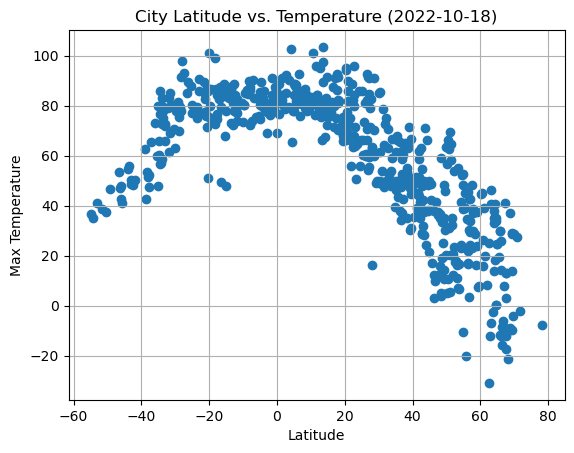

In [17]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis_df1 = city_data_df["Lat"]
y_axis_df1 = city_data_df["Max Temp"]
plt.scatter(x_axis_df1, y_axis_df1)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Temperature (2022-10-18)')
plt.grid(True)
# YOUR CODE HERE
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

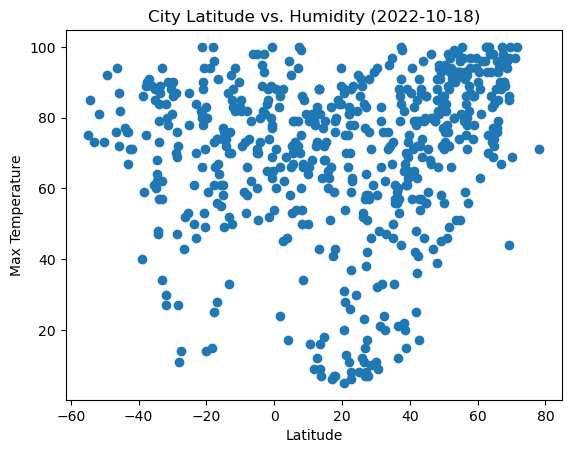

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_axis_df2 = city_data_df["Lat"]
y_axis_df2 = city_data_df["Humidity"]
plt.scatter(x_axis_df2, y_axis_df2)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Humidity (2022-10-18)')
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

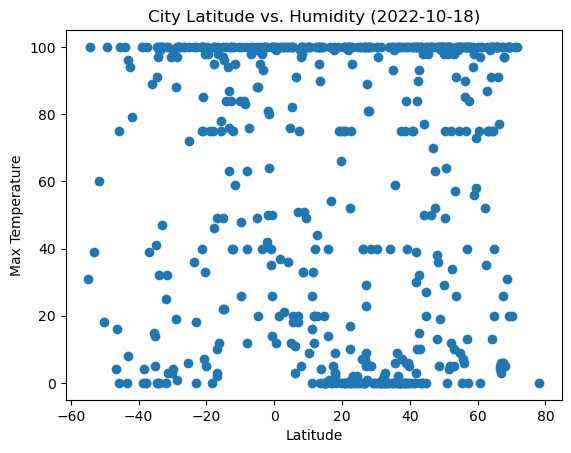

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis_df3 = city_data_df["Lat"]
y_axis_df3 = city_data_df["Cloudiness"]
plt.scatter(x_axis_df3, y_axis_df3)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Humidity (2022-10-18)')
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

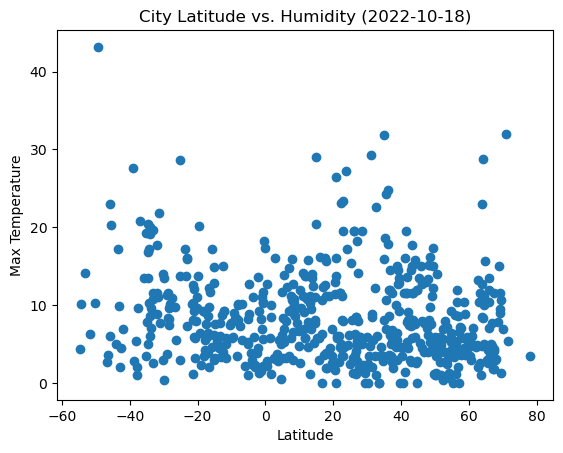

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_axis_df4 = city_data_df["Lat"]
y_axis_df4 = city_data_df["Wind Speed"]
plt.scatter(x_axis_df4, y_axis_df4)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Humidity (2022-10-18)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
from scipy import stats



In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
north_df = pd.DataFrame(city_data)

northern_hemi_df = north_df[north_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,vilyuchinsk,52.9306,158.4028,17.92,80,5,7.90,RU,1710939849
2,taitung city,22.7583,121.1444,64.67,59,75,8.05,TW,1710939850
7,enewetak,11.3474,162.3373,81.45,80,33,9.08,MH,1710939850
8,utrik,11.2278,169.8474,80.53,79,26,11.23,MH,1710939851
10,alaghsas,17.0187,8.0168,91.11,6,0,12.37,NE,1710939851


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
south_df = pd.DataFrame(city_data)

southern_hemi_df = south_df[south_df['Lat'] <=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,micheweni,-4.9667,39.8333,85.35,70,49,5.23,TZ,1710939849
3,alofi,-19.0595,-169.9187,73.29,94,75,2.30,NU,1710939850
4,blackmans bay,-43.0167,147.3167,50.13,76,8,1.99,AU,1710939850
5,margaret river,-33.9500,115.0667,58.66,84,0,8.55,AU,1710939850
6,grytviken,-54.2811,-36.5092,35.06,85,100,10.09,GS,1710939850


In [18]:
def linear_regression_plot(x_value, y_value, text_coord):
    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

    regress_values = x_value * slope + intercept
    
    line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot with the regression line
    plt.scatter(x_value, y_value, label="Data Points")
    plt.plot(x_value, regress_values, "r-", label="Regression Line")
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.annotate(line_equation, text_coord, fontsize=15, color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.legend()
    plt.savefig("../output_data/North-Temp-lat.png")
    
    plt.show()

The r-value is: 0.7328507475559511


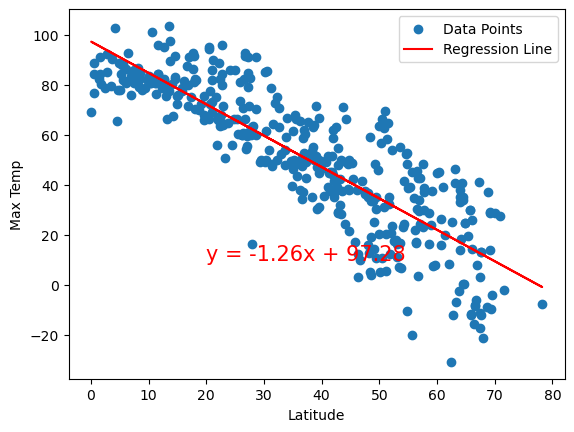

In [21]:
x_axis_df5 = northern_hemi_df["Lat"]
y_axis_df5 = northern_hemi_df["Max Temp"]


linear_regression_plot(x_axis_df5, y_axis_df5,(20,10))

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7328507475559511


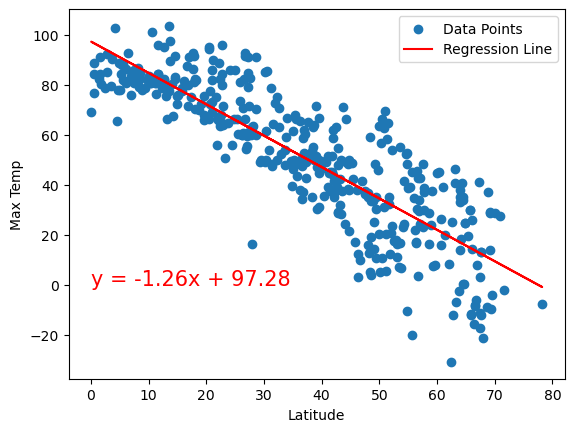

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

x_axis_df5 = northern_hemi_df["Lat"]
y_axis_df5 = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df5, y_axis_df5)

regress_values = x_axis_df5 * slope + intercept

line_equation = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Create a scatter plot with the regression line
plt.scatter(x_axis_df5, y_axis_df5, label="Data Points")
plt.plot(x_axis_df5, regress_values, "r-", label="Regression Line")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_equation, (0, 0), fontsize=15, color="red")
print(f"The r-value is: {rvalue**2}")
plt.legend()
plt.savefig("../output_data/North-Temp-lat.png")

plt.show()

The r-value is: 0.4541603851564853


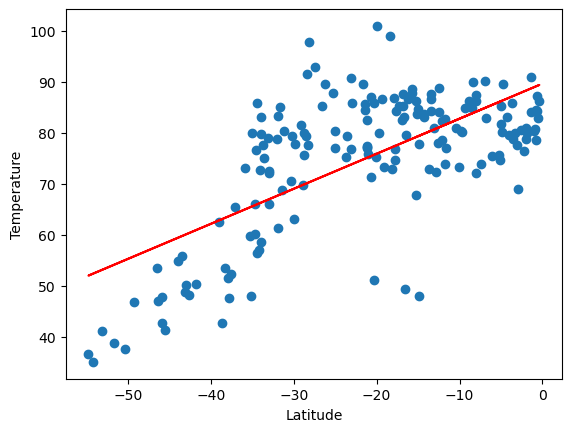

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_axis_df6 = southern_hemi_df["Lat"]
y_axis_df6 = southern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df6, y_axis_df6)

#### i addedd these commeents Get regression values
regress_values = x_axis_df6 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df6,y_axis_df6, label="Data Points")
plt.plot(x_axis_df6,regress_values,"r-", label="Regression Line")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/South-Temp-lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

''' The relationship between Temperuture and Lattitude
.  the Northern Hemisphere, the scatter plot shows data points for maximum temperature versus latitude. 
    The linear regression line equation suggests a negative correlation between latitude and maximum temperature, 
    meaning as you move away from the equator (increasing latitude), the maximum temperature tends to decrease.
. Similarly scatter plot for the Southern Hemisphere, given the negative latitudes. 
    The linear regression line has a positive slope, indicating a positive correlation between latitude and temperature in the Southern Hemisphere. 
    This would imply that as one moves towards the equator,  the temperature increases

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09819326991053874


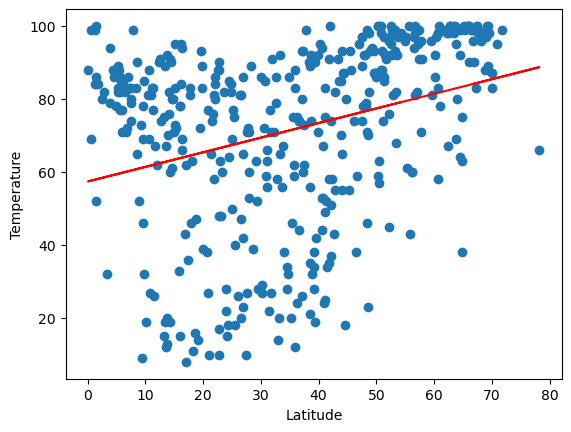

In [31]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_df7 = northern_hemi_df["Lat"]
y_axis_df7 = northern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df7, y_axis_df7)

#### i addedd these commeents Get regression values
regress_values = x_axis_df7 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df7,y_axis_df7)
plt.plot(x_axis_df7,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/North-humi-lat.png")

# Show plot
plt.show()


The r-value is: 0.08755335693652666


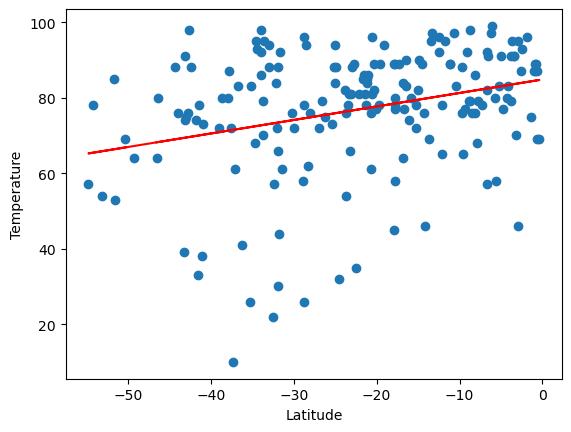

In [32]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis_df8 = southern_hemi_df["Lat"]
y_axis_df8 = southern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df8, y_axis_df8)

#### i addedd these commeents Get regression values
regress_values = x_axis_df8 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df8,y_axis_df8)
plt.plot(x_axis_df8,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/south-humi-lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationship between Humidity and Lattitude
.For the northern hemisphere, the linear regression line is upward sloping. 
    indicating a positive correlation between humidity and latitude. 
    This suggests that as one moves away from the equator towards the north pole, humidity levels tend to increase
. we see a similar upward trend with the regression line. 
    This would suggest that in the southern hemisphere, humidity also increases as latitude increases (moving away from the equator). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06422530162208526


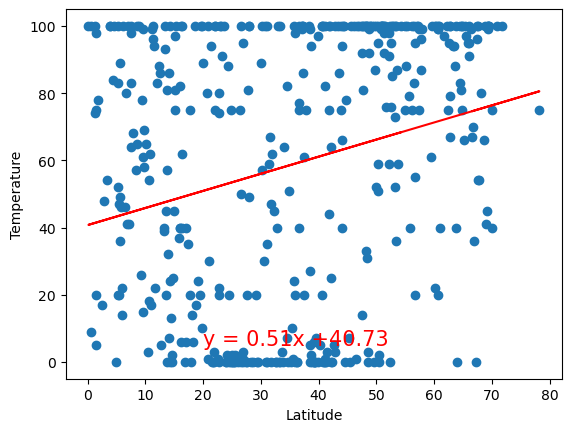

In [33]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_df9 = northern_hemi_df["Lat"]
y_axis_df9 = northern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df9, y_axis_df9)

#### i addedd these commeents Get regression values
regress_values = x_axis_df9 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df9,y_axis_df9)

plt.plot(x_axis_df9,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/north-clodi-lat.png")

# Show plot
plt.show()


y = 0.83x +81.2
The r-value is: 0.09668960405875969


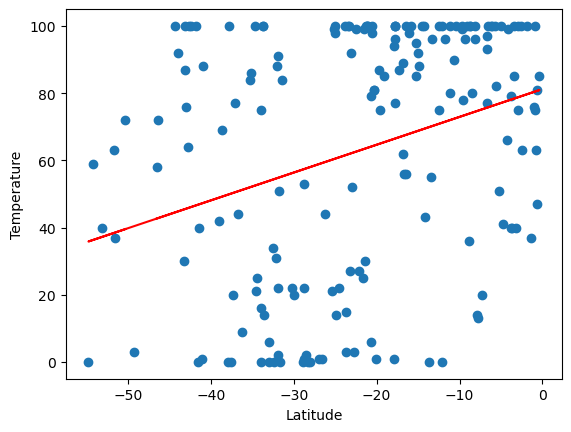

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_axis_df10 = southern_hemi_df["Lat"]
y_axis_df10 = southern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df10,y_axis_df10)

#### i addedd these commeents Get regression values
regress_values = x_axis_df10 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# i addedd these commeents Create Plot
plt.scatter(x_axis_df10,y_axis_df10)
plt.plot(x_axis_df10,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/south-clodi-lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The relationship between cloudiness and Lattitude
. The nothern hemisphere data indicates that there is a positive correlation between latitude and temperature, 
    which means as the latitude increases (moving away from the equator towards the pole), and the temperature also increases. 
. yet again, we see similarly to the first image, the southern hemisphere data suggests this line also appears to have a positive slope, 
    which would indicate that in the southern hemisphere, temperatures tend to increase as you move away from the equator towards the pole.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.011985026884889357


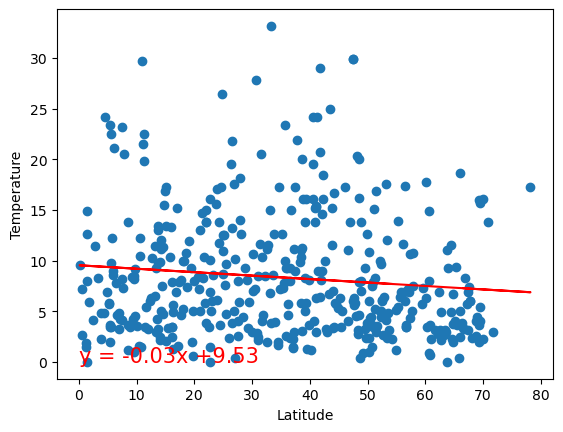

In [35]:
# Northern Hemisphere
# YOUR CODE HERE

x_axis_df11 = northern_hemi_df["Lat"]
y_axis_df11 = northern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df11, y_axis_df11)

#### i addedd these commeents Get regression values
regress_values = x_axis_df11 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# i addedd these commeents Create Plot
plt.scatter(x_axis_df11,y_axis_df11)

plt.plot(x_axis_df11,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/noth-wind-lat.png")

# Show plot
plt.show()


y = -0.04x +7.54
The r-value is: 0.01122129941588664


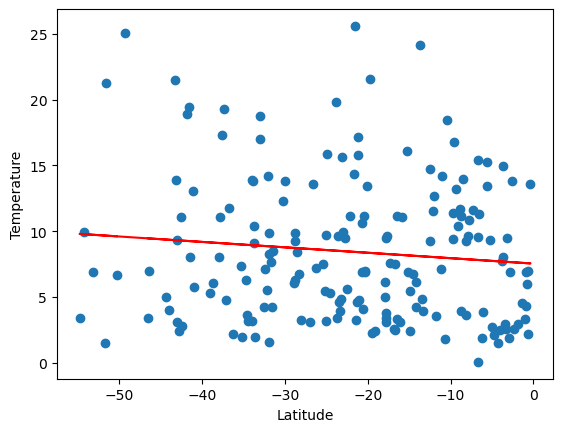

In [36]:
# Southern Hemisphere
# YOUR CODE HERE

x_axis_df12 = southern_hemi_df["Lat"]
y_axis_df12 = southern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_axis_df12, y_axis_df12)

#### i addedd these commeents Get regression values
regress_values = x_axis_df12 * slope + intercept

# i addedd these commeents Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)
# i addedd these commeents Create Plot
plt.scatter(x_axis_df12,y_axis_df12)
plt.plot(x_axis_df12,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/south-wind-lat.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The relationship between Wind Speed and Lattitude
. In summary for this sections, the Northern Hemisphere, there is a slight positive correlation between latitude and wind speed, 
    suggesting wind speed increases as one moves away from the equator. While in the Southern Hemisphere, 
    the correlation between latitude and wind speed is negligible, implying that latitude isn't a strong predictor of wind speed in this data set. 
    The plots indicate that other factors likely have a more significant impact on wind speed than just latitude. '''
